# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

In [283]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [284]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


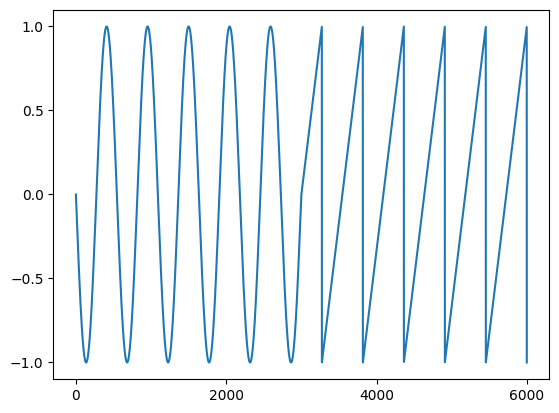

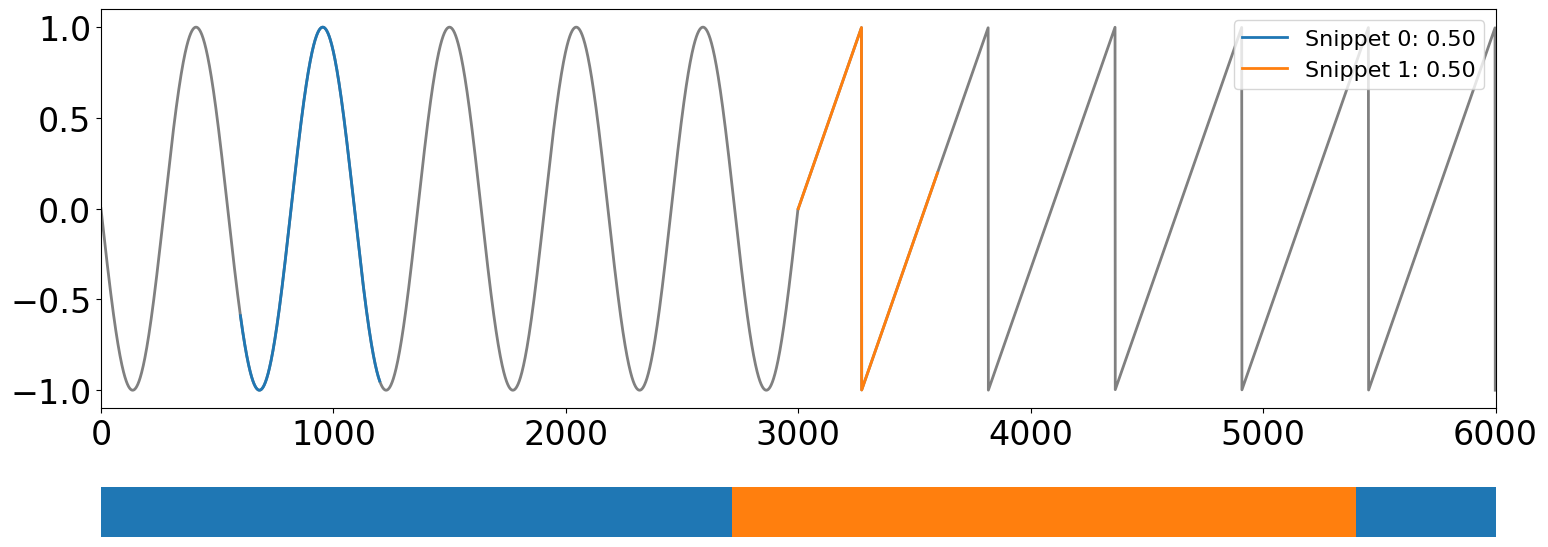

<AxesSubplot: >

In [285]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stumpy import snippets
from modules.snippets import plot_snippets

In [287]:
# Загрузка данных из файла
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

In [288]:
# временной интервал
start_time = 1790
end_time = 1930

In [289]:
timestamp = data[0]

In [290]:
activityID = data[1]

In [291]:
gyrsdata = data[11]

In [292]:
# Фильтрация данных 
filteredgyrsdata = gyrsdata[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activityID[np.where((timestamp >= start_time) & (timestamp <= end_time))]


In [293]:
filteredactivityIDdata -= filteredactivityIDdata.min()

In [294]:
snp = snippets(filteredgyrsdata, 600, 2, percentage=0.5)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

600


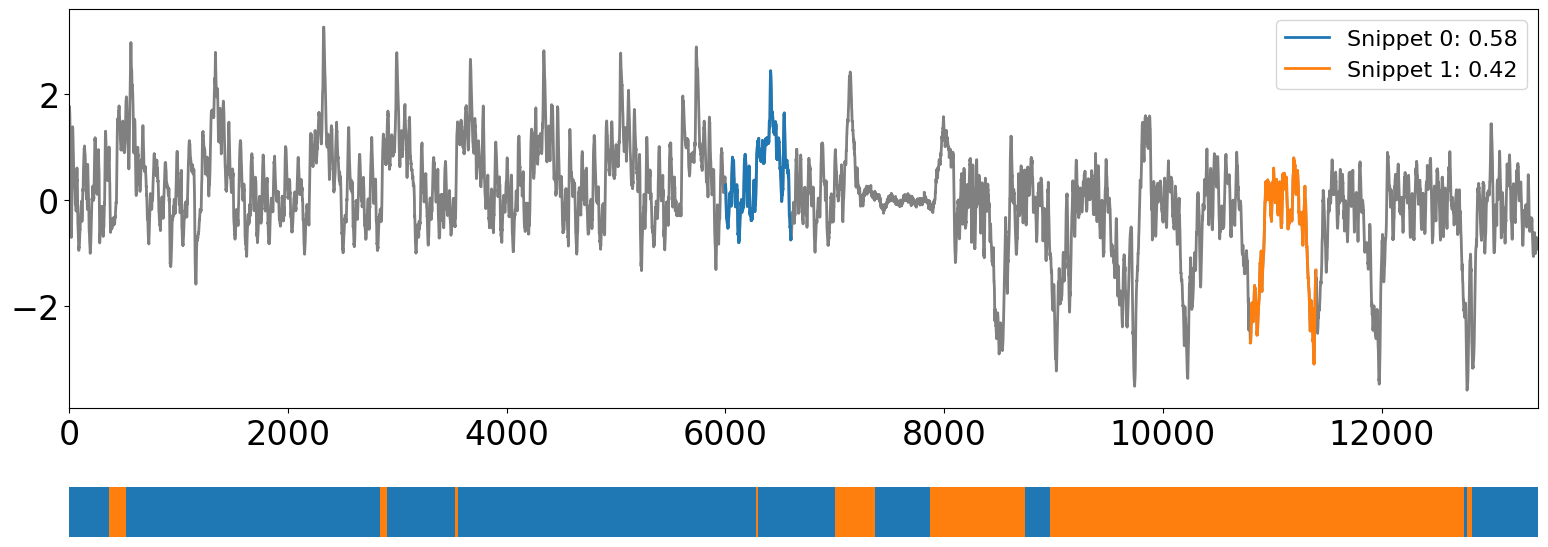

<AxesSubplot: >

In [295]:
plot_snippets(filteredgyrsdata, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [296]:
from sklearn.metrics import accuracy_score
import numpy as np
snpfilteredactivityIDdata = np.zeros(len(filteredactivityIDdata))
for value, start, end in snp[-1]:
    snpfilteredactivityIDdata[start:end] = value
# Оценка точности
accuracy = accuracy_score(filteredactivityIDdata, snpfilteredactivityIDdata)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.86


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Точность классификации 0.86 означает, что 86% меток активностей, предсказанных на основе сниппетов, совпадают с истинными метками.

Сниппеты хорошо представляют типичные паттерны активностей. Результаты показывают, что алгоритм способен автоматически выделять повторяющиеся и характерные движения. Cниппеты позволяют кластеризовывать временные ряды.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [297]:
# Загрузка данных из файла
data = np.loadtxt('./datasets/PAMAP/PAMAP.txt')

In [298]:
# временной интервал
start_time = 1790
end_time = 1930

In [299]:
timestamp = data[0]

In [300]:
activityID = data[1]

In [301]:
x = data[10]

In [302]:
y = data[11]

In [303]:
z = data[12]

In [304]:
# Фильтрация данных 
filteredx = x[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredy = y[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredz = z[np.where((timestamp >= start_time) & (timestamp <= end_time))]
filteredactivityIDdata = activityID[np.where((timestamp >= start_time) & (timestamp <= end_time))]

In [305]:
filteredactivityIDdata -= filteredactivityIDdata.min()

In [306]:
xsnp = snippets(filteredx, 600, 2,percentage=0.5)


600


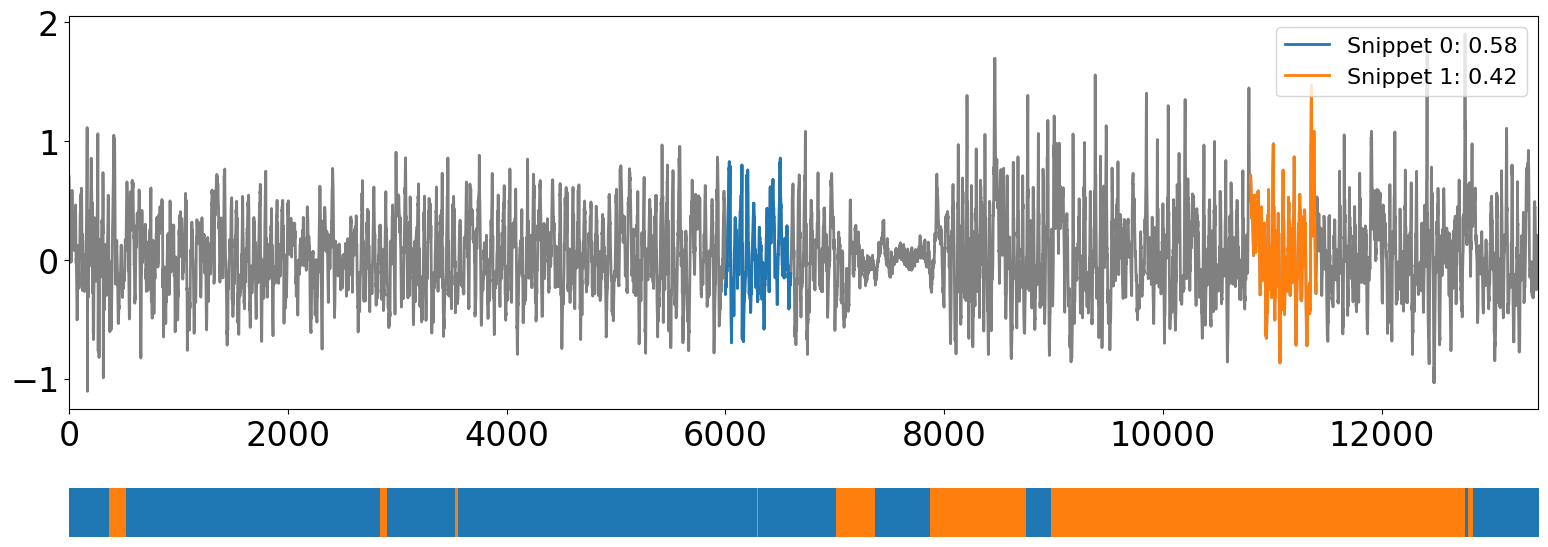

<AxesSubplot: >

In [307]:
plot_snippets(filteredx, snp)

In [308]:
ysnp = snippets(filteredy, 600, 2,percentage=0.5)

600


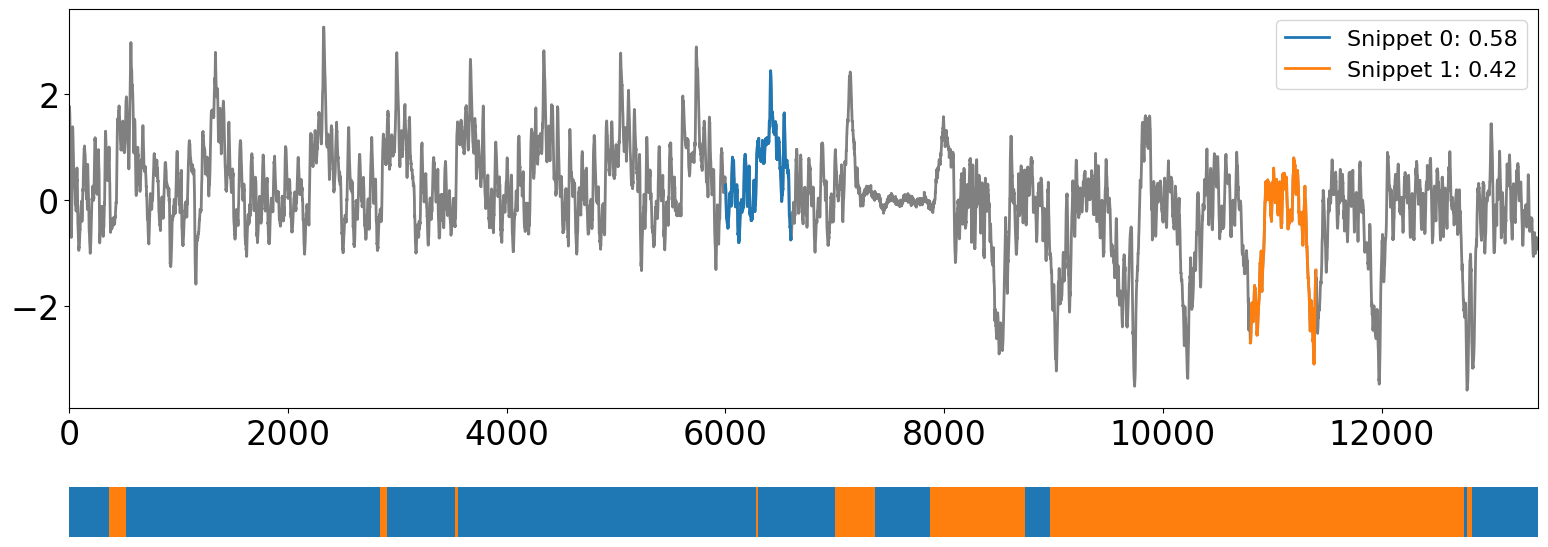

<AxesSubplot: >

In [309]:
plot_snippets(filteredy, snp)

In [310]:
zsnp = snippets(filteredz, 600, 2, percentage=0.5)

600


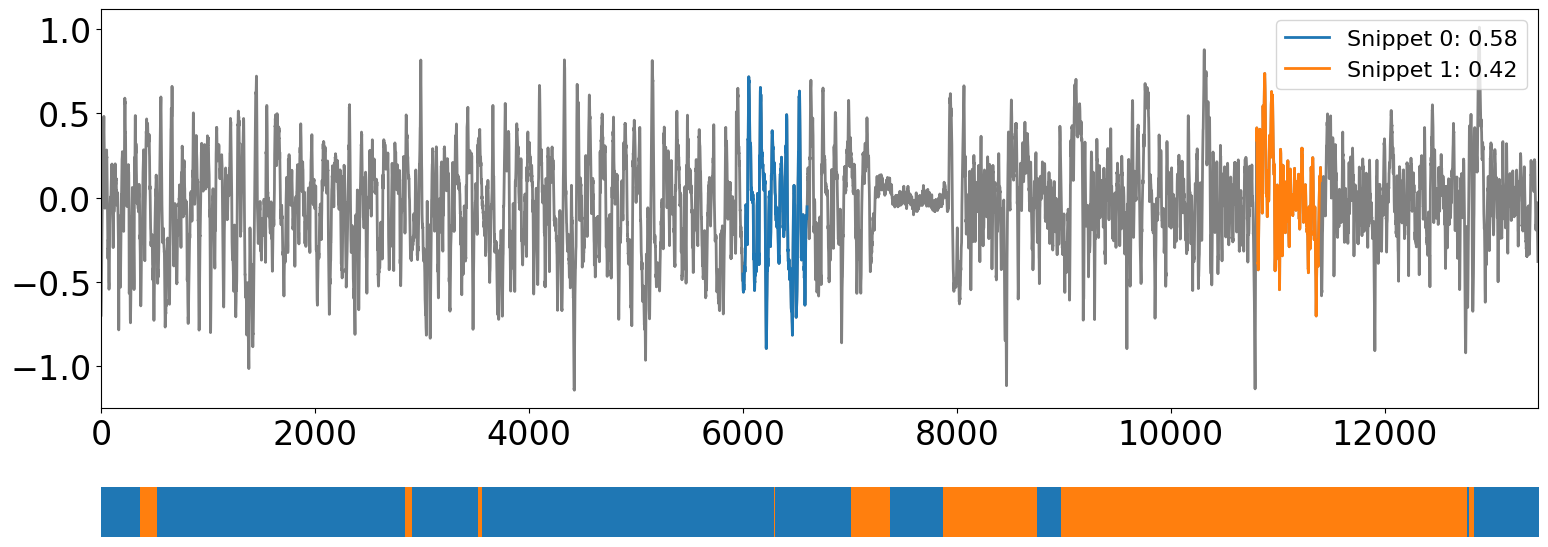

<AxesSubplot: >

In [311]:
plot_snippets(filteredz, snp)

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [312]:
xactivity = np.zeros(len(filteredactivityIDdata))
yactivity = np.zeros(len(filteredactivityIDdata))
zactivity = np.zeros(len(filteredactivityIDdata))


In [317]:
for value, start, end in xsnp[-1]:
    xactivity[start:end] = value

for value, start, end in ysnp[-1]:
    yactivity[start:end] = value

for value, start, end in zsnp[-1]:
    zactivity[start:end] = value

snpactivity = np.zeros(len(filteredactivityIDdata))

for i, votes in enumerate(zip(xactivity, yactivity, zactivity)):
    snpactivity[i] = np.argmax(np.bincount(votes))

accuracy = accuracy_score(filteredactivityIDdata, snpactivity)
print(f"Точность классификации: {accuracy:.2f}")

Точность классификации: 0.89


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Точность 89% означает, что алгоритм правильно предсказал метки активности в 89% временных интервалов. Это указывает на соответствие между истинными метками и предсказанными метками. А также, говорит о том что использование всех 3 осей дает большую точность относительно одной из других осей.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [320]:
profileareas = []

for K in range(1, 10):
    xsnp, ysnp, zsnp = (snippets(data, 600, K, percentage=0.5)
                           for data in (filteredx, filteredy, filteredz))

    profilearea = np.min([xsnp[-2][k] + ysnp[-2][k] + zsnp[-2][k]
                           for k in range(K)])

    profileareas.append(profilearea)

In [321]:
changes = [profileareas[k - 1] / profileareas[k] - 1 for k in range(1, 9)]

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

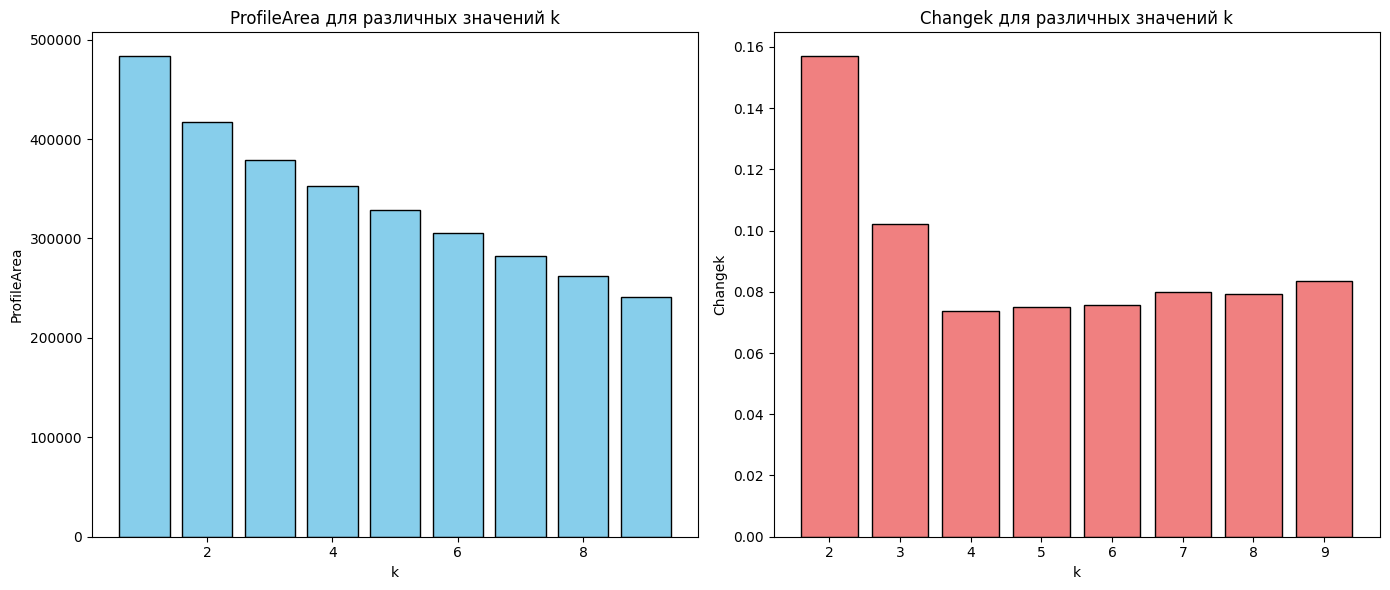

In [323]:

kvalues = np.arange(1, 10)
# Визуализация столбчатых диаграмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма для ProfileArea
ax1.bar(kvalues, profileareas, color='skyblue', edgecolor='black')
ax1.set_title('ProfileArea для различных значений k')
ax1.set_xlabel('k')
ax1.set_ylabel('ProfileArea')

# Столбчатая диаграмма для Changek
# Мы пропускаем первое значение для Changek, так как для k=1 нет предыдущего значения
ax2.bar(kvalues[1:], changes, color='lightcoral', edgecolor='black')
ax2.set_title('Changek для различных значений k')
ax2.set_xlabel('k')
ax2.set_ylabel('Changek')

# графики
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

Анализ полученных результатов на основе графиков ProfileArea и Change позволяет выявить ключевые особенности зависимости между размером сниппета k и характеристиками временного ряда, а также помочь выбрать оптимальное значение k.

Наилучшее значение k = 2 следует, из-за наибольшего значения Change.

